<a href="https://colab.research.google.com/github/benvictoria17/DataAnalytics/blob/master/Ethereum%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Ethereum%20Data/ETH-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0


In [3]:
df.Date = pd.to_datetime(df.Date)
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day

df['Price'] = df['Adj Close']

df['logPrice'] = np.log(df.Price)
df['logChange'] = df.logPrice.diff()
df['percChange'] = df.Price.pct_change()

In [4]:
df.Volume = df.Volume / 1e6

In [5]:
sel_vars = ['Volume','Price','logPrice','logChange','percChange']
df[sel_vars].describe()

,Volume,Price,logPrice,logChange,percChange
count,2177.000000,2177.000000,2177.000000,2173.000000,2180.000000
mean,7125.411858,399.066543,4.681657,0.003033,0.005293
std,10651.801311,619.488385,2.101586,0.068045,0.064807
min,0.102128,0.434829,-0.832802,-1.302871,-0.728249
25%,39.112000,13.883900,2.630730,-0.023367,-0.023008
50%,2201.159936,200.634995,5.301487,0.000717,0.000692
75%,9818.257463,392.189972,5.971746,0.029332,0.029766
max,84482.912776,4168.701172,8.335360,0.410335,0.507323


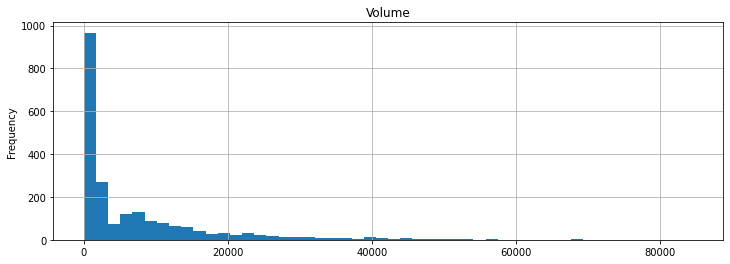

In [6]:
plt.figure(figsize=(12,4))
df.Volume.plot(kind='hist', bins=50)
plt.title('Volume')
plt.grid()
plt.show()

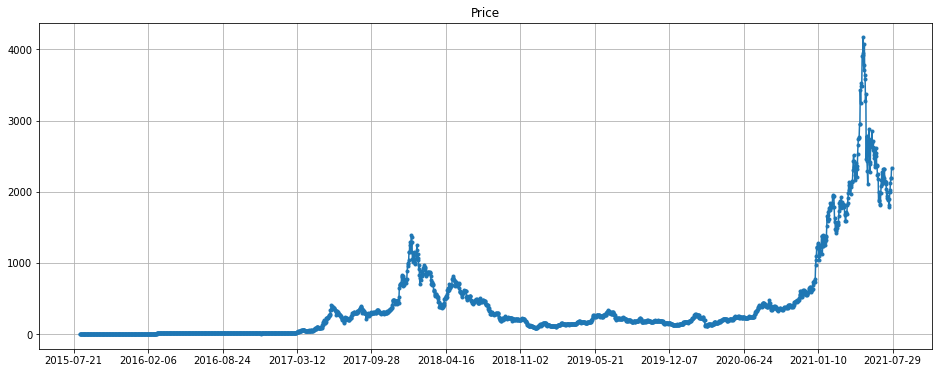

In [7]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df.Price, marker='.')
ax.xaxis.set_major_locator(plt.MaxNLocator(12)) # reduce number of x-labels
plt.title('Price')
plt.grid()
plt.show()

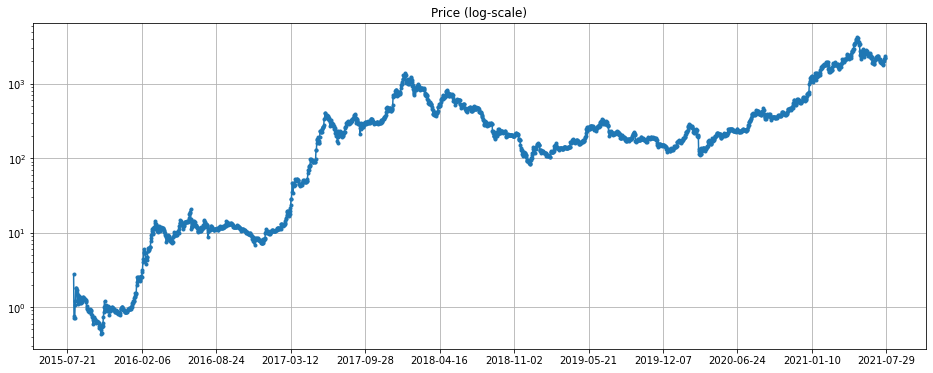

In [8]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df.Price, marker='.')
ax.xaxis.set_major_locator(plt.MaxNLocator(12)) # reduce number of x-labels
ax.set_yscale('log')
plt.title('Price (log-scale)')
plt.grid()
plt.show()

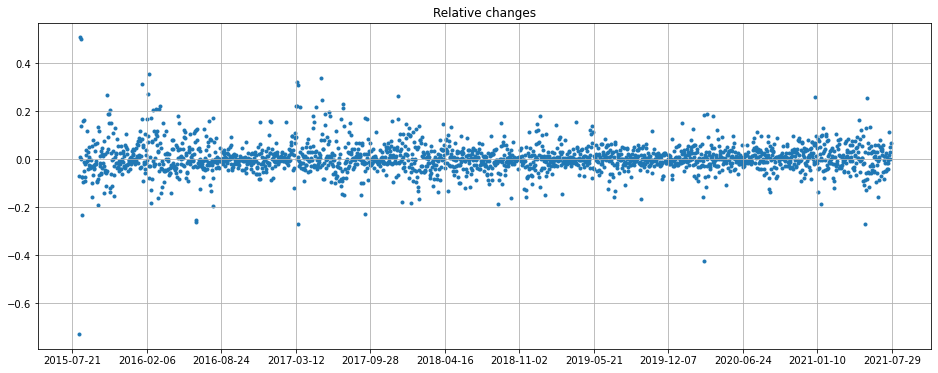

In [9]:
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(df.Date, df.percChange, marker='.')
ax.xaxis.set_major_locator(plt.MaxNLocator(12)) # reduce number of x-labels
plt.title('Relative changes')
plt.grid()
plt.show()

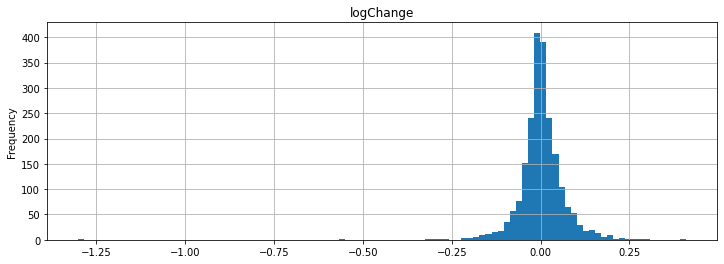

In [10]:
plt.figure(figsize=(12,4))
df.logChange.plot(kind='hist', bins=100)
plt.title('logChange')
plt.grid()
plt.show()

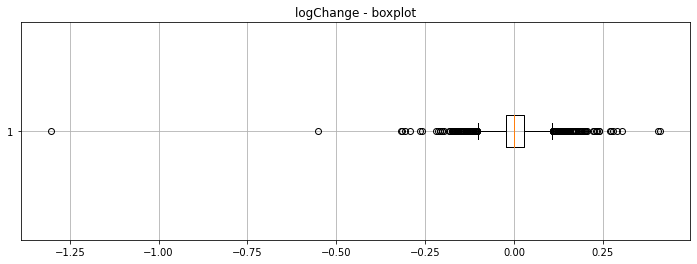

In [11]:
foo = df.logChange[~df.logChange.isna()] # filter missings
plt.figure(figsize=(12,4))
plt.boxplot(foo, vert=False)
plt.title('logChange - boxplot')
plt.grid()
plt.show()

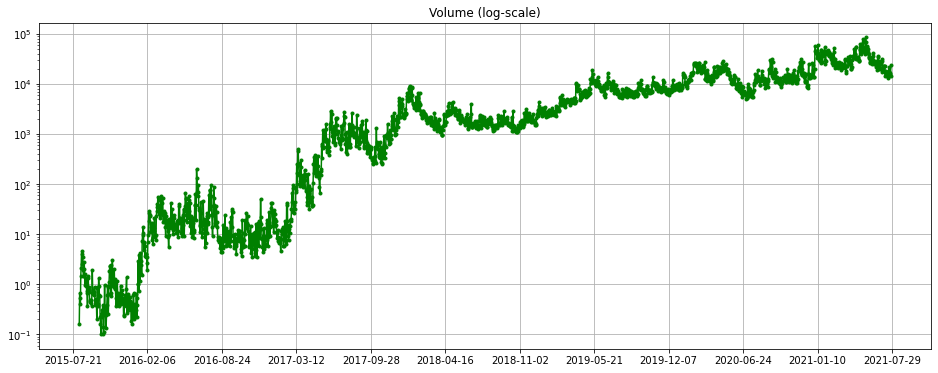

In [12]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df.Volume, marker='.', 
        color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(12)) # reduce number of x-labels
ax.set_yscale('log')
plt.title('Volume (log-scale)')
plt.grid()
plt.show()

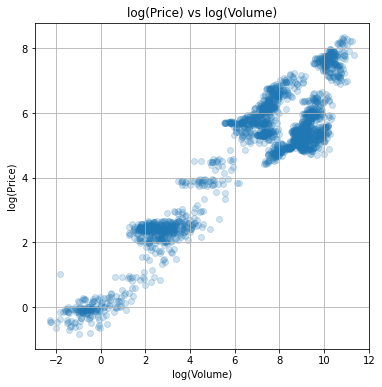

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(np.log(df.Volume), df.logPrice, alpha=0.2)
plt.title('log(Price) vs log(Volume)')
plt.xlabel('log(Volume)')
plt.ylabel('log(Price)')
plt.grid()
plt.show()

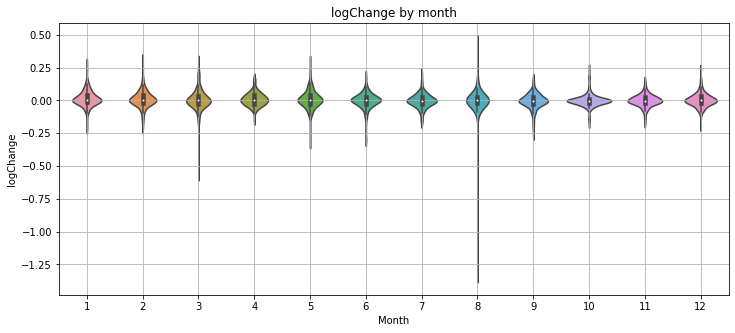

In [14]:
plt.figure(figsize=(12,5))
sns.violinplot(data=df, x='Month', y='logChange')
plt.title('logChange by month')
plt.grid()

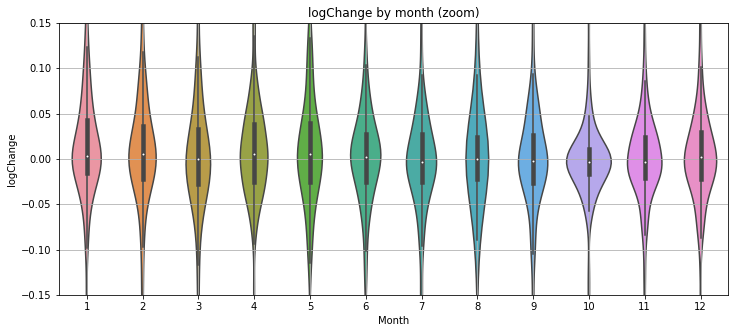

In [15]:
y_max = 0.15
plt.figure(figsize=(12,5))
sns.violinplot(data=df, x='Month', y='logChange')
plt.ylim(-y_max, y_max) # cap outliers
plt.title('logChange by month (zoom)')
plt.grid()

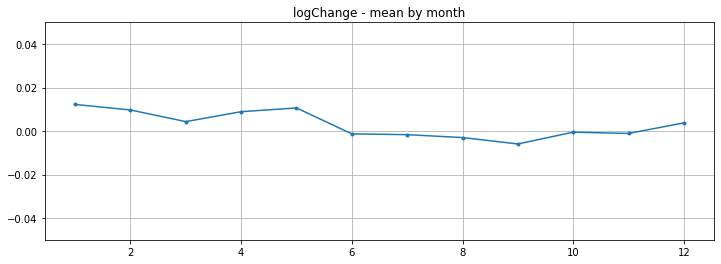

In [16]:
plt.figure(figsize=(12,4))
logC_month = df.groupby(by='Month')['logChange'].mean()
plt.plot(logC_month, marker='.')
plt.ylim(-0.05, 0.05)
plt.title('logChange - mean by month')
plt.grid()
plt.show()